In [1]:
import os

import cupy as cp
import pandas as pd
import cudf
import numpy as np
import glob
from datetime import datetime
import matplotlib.pyplot as plt

## Import all the csv files via `cudf.read_csv`

In [2]:
def import_csv(dir_name):
    """
        get the cudf dataframe from each month

    """   
    df_ls=[]
    for fname in glob.glob(dir_name+'/*'):
        daily_df=cudf.read_csv(fname, parse_dates=['Time Stamp'])
        df_ls.append(daily_df)
    monthly_df=cudf.concat(df_ls, axis=0)
    monthly_df = monthly_df.sort_values(by='Time Stamp').dropna()
    
    return monthly_df
    

In [3]:
jan_df=import_csv('load_data/20210101pal_csv')
feb_df=import_csv('load_data/20210201pal_csv')
mar_df=import_csv('load_data/20210301pal_csv')
apr_df=import_csv('load_data/20210401pal_csv')
may_df=import_csv('load_data/20210501pal_csv')
jun_df=import_csv('load_data/20210601pal_csv')
jul_df=import_csv('load_data/20210701pal_csv')

In [4]:
jan_df.head()

,Time Stamp,Time Zone,Name,PTID,Load
0,2021-01-01,EST,CAPITL,61757,1253.6528
1,2021-01-01,EST,CENTRL,61754,1646.5823
2,2021-01-01,EST,DUNWOD,61760,602.6414
3,2021-01-01,EST,GENESE,61753,1009.6906
4,2021-01-01,EST,HUD VL,61758,1031.5640


## Preliminary visualization - plot the time series from Jan 2021- July 2021

In [5]:
whole_ts=cudf.concat([jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df], axis=0)
whole_ts=whole_ts.reset_index(drop=True)

In [6]:
#The day of the week with Monday=0, Sunday=6.
whole_ts['weekday']=whole_ts['Time Stamp'].dt.dayofweek
whole_ts['hour']=whole_ts['Time Stamp'].dt.hour
whole_ts['month']=whole_ts['Time Stamp'].dt.month


weekday_map={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
whole_ts['dayofweek']=whole_ts['weekday'].map(weekday_map)

In [7]:
whole_ts.tail()

,Time Stamp,Time Zone,Name,PTID,Load,weekday,hour,month,dayofweek
653527,2021-07-29 01:25:00,EDT,MHK VL,61756,742.6400,3,1,7,Thursday
653528,2021-07-29 01:25:00,EDT,MILLWD,61759,281.5977,3,1,7,Thursday
653529,2021-07-29 01:25:00,EDT,N.Y.C.,61761,5927.3965,3,1,7,Thursday
653530,2021-07-29 01:25:00,EDT,NORTH,61755,545.2728,3,1,7,Thursday
653531,2021-07-29 01:25:00,EDT,WEST,61752,1576.6697,3,1,7,Thursday


(array([18628., 18659., 18687., 18718., 18748., 18779., 18809., 18840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

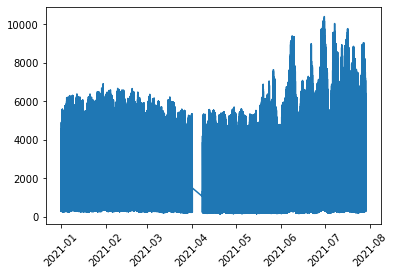

In [14]:
plt.plot(whole_ts['Time Stamp'].to_array(), whole_ts['Load'].to_array())
plt.xticks(rotation = 45) 

In [8]:
whole_ts.to_csv('Jan2021-July2021-load.csv', index=False)